# TensorFlow

## 基础应用

### tensorflow 基本特征

### class_1
1. 第一节
    - 使用 TensorFlow，你必须明白 TensorFLow 一些特性
        1. 使用图（graph）来表示计算任务（Tensorflow 有一个默认图）
        2. 在被称之为 __会话__ 的上下文（content）中执行图
        3. 使用 tensor 表示数据
        4. 通过 __变量__ （Variable）维护状态
        5. 使用 feed 和 fetch 可以任意的操作（arbitrary operation）赋值或者从其中获取数据
    - Tensorflow 工作流程
        1. Tensorflow 是一个编程系统，使用图来表示计算任务，图中的节点被称之为 op（operation 的缩写）。一个 op 或以获得 0 个或者多个 tensor，执行计算任务，产生 0 个或者多个 tensor。每一个 tensor是一个类型化的多维数据。例如：将一组图像集表示为一个 4 维浮点数数组，这 4 个维度是 [batch, height, width, channels]
        2. 一个 Tensorflow 的图描述了计算任务，图必须在 ）__会话__ 里启动。__会话__ 将图的 op 分发到诸如 CPU 或 GPU 之类的设备上，同时提供执行 op 的方法。这些方法执行后，将会产生 tensor 返回。在 Python 语言中，返回的 tensor 是 numpy ndarray 对象；在 c\c++ 语言中，返回的 tensor 是 tensorflow：：Tensor 实列
    - 计算图
        1. Tensorflow 程序通常被分为 __构建阶段、执行阶段__ ，在构建阶段，op的执行步骤被描述成一个图；在执行阶段，使用会话执行图中的 op
        2. 例如：通常在构造阶段创建一个图来表示和训练神经网络，然后在执行阶段反复执行图中的训练 op
        3. Tensorflow 支持 c\c++ 、 Python 编程语言。目前，Tensorflowe 的 Python 库更加易用，Python 库提供了大量辅助函数来简化构件图工作。
    - 构建图
        1. 构建图的第一步，是创建 __源__ op（source op）。源 op 不需要任何输入。例如：常量（Constant）。源 op 的输入被传递给其他 op 做运算。
        2. Tensorflow Python 库有一个 __默认图（default graph）__ ，op 构造器可以为其增加节点，这个默认图对许多程序已经足够用了
    - 在会话中启动图
        1.构造阶段完成，才能启动图，启动图的第一步是创建一个 Session 对象，如果创建无任何参数，会话构造器将启动默认图
    - Tensor
        1. Tensorflow 程序使用 tensor 数据结构来代表所有数据，计算图中，操作间传递的数据都是 tensor ，你可以把 Tesorflow tensor 看作是一个 n 为数据或列表。一个 tensor 包含一个静态类型 rank，和 shape。

2. 第二节
    - Variable 变量
        1. 变量是维护图执行过程的状态信息
        2. __变量自身是可以改变的__
    - 变量初始化
        1. 图中有 Variable ，在会话中启动图，必须先声明 Variable 。<br> `init_op = tf.global_variables_initializer()`
    - Variable 作用
        1. 例如：可以将一个神经网络的权重作为一个变量存储在一个 tensor 中，在训练过程中，更新这个 tensor
        
3. 第三节
    - 交互式使用
        1. 进入交互式 <br> `sess = tf.InteractiveSession()`
        2. 变量 x 初始化 <br> `x.initializer.run()`
        3. op 计算 <br> `op.eval()` 
        
4. 第四节
    - Fetch：获取多个 tensor 值，在 op 的一次运行中一起获得
        1. 为取回操作的输出结果，可以在使用 Seesion 对象的 run() 调用执行图时，传入 op ，返回单个节点
        2. 取回多个节点，可以在 Session 对象的 run() 调用执行图时，传入多个 op，返回多个节点 <br> `sess.run(fetches=[x_1, x_2])`
    - Feed
        1. `tf.placeholder(dtype=tf.float32, shape=(None, None))` 占位符，就是等着在会话执行图时，对占位符进行输入数据
        2. 计算图中引入 tensor ，以常量或者是变量的形式存储。Tensorflow 还提供了 feed 机制，该机制可以临时替代图中的任意操作中的 tensor，可以对图中任意操作提交补丁，直接插入一个 tensor
        3. feed 使用一个 tensor 临时值替换一个操作输出结果，你可以提供 feed 数据作为 Session.run() 调用参数，feed只在调用它的方法中有效，方法结束 feed 小时。最常见的用例是将某些特殊的操作定为 feed 操作，标记方法是使用 tf.placeholder() 为这些操作创建占位符 <br> `Session.run(output, feed_dict={x_1:value_1, x_2:value_2})`
        
5. 第五节
    - 拟合一条直线
        1. 初始化 x_data 为 100 个随机点
        2. y_data = 0.1 * x_data + 0.2
    - 给定模型 
        1. y = x_data * k + b
    - 定义 loss
        1. loss = tf.reduce_mean(tf.square(y_data - y))
        2. loss 是平均方差
    - 优化函数
        1. 使用梯度下降，设定学习率为 0.2 <br> optimizer = tf.train.GradientDescentOptimizer(0.2)
    - 最小代价函数
        1. 将 loss 最小化 <br> train = optimizer.minimize(loss)
    - 设定迭代次数
        1. 400 ，就是循环训练 400 次，在会话中执行计算图 400 次
        

## 基本实例

### 线性回归、MNIST 数据分类

### class_2
1. 第一节
    - 非线性回归：初始化数据(x_data \ y_data)
        1. 使用模块 <br> tensorflow \ numpy \ matlplotlib.pyplot
        2. 使用 numpy 初始化 [-0.5, 0.5] 均匀分布的 200 点 x_data，并给数据增加一个维度,x_data[:, newaxis] <br> x_data.shape=(200) => x_data.shape(200, 1)
        3. 使用 numpy 初始化 noise = np.random.normal(size=(x_data.shape)) 200 个服从正太分布的数据
        4. 使用 numpy 初始化 y_data= np.square(x_data) + noise
    - 非线性回归：构造神经网络阶段
        1. 初始化 2 个占位符，作为神经网络的输入 <br> tf.placeholder(dtpye=tf.float32, shape(None, 1)) <br> shape=(None, 1) None 表示任何维度
        2. 初始化 2 个变量，作为神经网络隐藏层的权重（weight）、偏置项（b）<br> w.shape(1, 10) \ b.shape(1, 10) <br> b 为 1 行 10 列，b 使用一行加了 200 行
        3. 激活函数为 tanh（双曲正切）
        ---
        4. 初始化 2 个变量，作为神经网络输出层的 weight、b
        5. 激活函数为 tanh
    - 定义loss
        1. loss 为平均方差
    - 定义优化函数
        1. 梯度下降
    - 最小代价函数
        1. optimizer.minimize(loss)
    - 设置迭代
        1. 实际是循环执行 __最小代价函数__ 的次数
    - 使用 matplotlib.pyplot as plt画图
        1. 散点图 plt.scatter(x, y)
        2. 曲线图 plt.plot(x, y)
        3. 显示 plt.show()
        
2. 第二节
    - MNIST 数据集
        1. 下载数据集被分为两部分：60000 个训练数据（mnist.train）、10000 个测试数据集（mnist.test），其数字范围 [0, 9]
    - 图片（mnist.train.images）
        1. 每一张图片包含 28 * 28 个像素，把这些像素组成一个向量，长度为 28 * 28 = 784。在 MNIST 训练数据集中 mnist.train.images是一个形状为 [60000, 784] 的张量，第一个维度用来检索图片，第二个维度用来检索每张图片的像素点。图片的像素点值为 [0, 1] 之间
    - 标签（mnist.train.labels）
        1. MNIST 数据集标签是介于 [0, 9] 的数字，把标签转换为 “one-hot vector”。一个 one-hot 向量除了某一位数字为 1， 其他维度数字都是 0。比如：标签 0 表示为 [1, 0, 0 ,0 ,0 ,0 ,0 ,0 ,0 , 0]。因此，mnsit.train.labels 是一个 [60000, 10] 的数字矩阵
    - 测试样本
        1. 同上 <br> <br>
    - softmax 函数介绍
        1. MNIST数据集的结果是 [0, 9]，模型可能推测出一张图片是数字 9 的概率为 80%、是数字 8 的概率为 10%、其他概率值更低，总体概率相加为 1，这就是 softmax 回归模型的案例。 <font color=red>__softmax 模型可以给每一个对象分配概率，其总的概率为 1__。</font>
        2. softmax 函数公式 <br> <br> $softmax(x_i)=\frac{exp(x_i)}{\sum_{j}exp(x_j)}$
    - 例（输出结果为 [1, 3, 5]）
        1. $e^1=2.718$ &nbsp; &nbsp; &nbsp; &nbsp; $p_1=\frac{e^1}{e^1+e^3+e^5}=0.016$ <br> <br>
        2. $e^3=20.086$ &nbsp; &nbsp; &nbsp; &nbsp; $p_2=\frac{e^3}{e^1+e^3+e^5}=0.117$ <br> <br>
        3. $e^1=148.413$ &nbsp; &nbsp; &nbsp; &nbsp; $p_3=\frac{e^5}{e^1+e^3+e^5}=0.867$ <br> <br>
        4. $e^1+e^3+e^5=171.217$ <br> <br>
        5. $p_1+p_2+p_3=1$
        
3. 第三节
    - MNIST 数据集，手写数字分类
        1. 加载 MNIST 数据集 <br> 分类 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 10 个数字
        2. 定义网络结构 <br> 输入层、输出层
        3. 激活函数使用 softmax 函数
        4. loss 函数为均方差
        5. 优化器使用梯度下降
        6. 最小化 loss 函数
        7. 循环训练 <br> 批次大小：就是一次训练的照片数量 <br> 批次：样本总数 除以 批次大小 = 批次 <br> 迭代次数：就是总样本训练的次数

## 损失函数

### 梯度下降

### 梯度下降法理解
1. 什么是梯度下降法
    - 梯度下降法不是机器学习算法
    - 它是一种基于搜索的最优化方法
    - 作用 <br> 最小化损失函数
    - 梯度上升法 <br> 最大化一个效果函数
2. 学习率
    - $\eta$ 称之为 __学习率__ （learning rate）
    - $\eta$ 的取值影响获得最优解的速度
    - $\eta$ 取值不合适，甚至得不到最优解
    - $\eta$ 是梯度下降法的一个超参数 <br> 需要人工设定
3. 并不是所有函数都有唯一的极值点（多元函数）
    - 函数的__鞍点__ , 导数为 0，局部最优解，需要求得全局最优解
    - 解决方案 <br> 多次运行，随机初始化点，梯度下降法的初始点也是一个超参数（人工设定）
4. 梯度下降的原理
    - loss 函数为多元函数（权重、偏置）
    - loss 多元函数的梯度，就是 loss 函数最陡的方向，需要求得 loss 最小值、且收敛时间最快
    - 函数的梯度为函数最陡峭的方向，如果使收敛速度最快，就需要向函数梯度最大（最陡）的方向上移动
    - loss 最小化，有可能求得最小值，为局部最小，而非全局最小值

### 代价函数

### class_3
1. 第一节
    - sigmoid 函数：&nbsp; &nbsp; &nbsp; &nbsp; $sigmoid(x)=\frac{1}{1+e^{-x}}$
        1. 特性 sigmoid 函数为 S(x) 其倒导数为 &nbsp; &nbsp; &nbsp; &nbsp; $\frac{\partial S(x)}{\partial x}=S(x)\times(1-S(x))$
2. 第二节
    - 均方差代价函数：&nbsp; &nbsp; &nbsp; &nbsp; $C=\frac{1}{2n}\sum_{x}||y(x)-a^L(x)||^2$
        1. 其中，C 表示代价函数，x 表示样本，y表示实际值，a 表示模型输出值，n 表示样本总和
        2. $a=\sigma(Z)$ &nbsp; &nbsp; $Z=\sum{W_j\times X_j+b}$
        3. $\sigma()$ 为激活函数
        4. 当样本数量为 1 时（n=1）&nbsp; &nbsp; $C=\frac{(y-a)^2}{2}$ 
        5. 假如，使用 __梯度下降（Gradient descent）__ 来调整权值参数大小，权值 W 、偏置 b 的推导公式如下： <br> $\frac{\partial C}{\partial W}=(a-y)\acute{\sigma(Z)}x$ <br> <br> $\frac{\partial C}{\partial b}=(a-y)\acute{\sigma(Z)}$ <br> 其中，Z 表示神经元的输出，$\sigma$ 表示激活函数， <font color=red>__W 和 b 的梯度跟激活函数成正比，激活函数的梯度越大，W 和 b 的大小调整的越快，训练收敛的就越快。__ </font>
        6. 如下 sigmoid 函数图像；在 $(-\infty, -4)$ ，$(4, +\infty)$ sigmoid 导数是逐渐变缓的，正如上面所说，loss 损失函数 W、b 的梯度和激活函数梯度成正比，激活函数梯度放缓，W、b 的更新速度也相应放缓，趋近于0，这就导致梯度消失问题（W、b 几乎停止更新）
        ---
    - 交叉熵代价函数
        1. 换一个思路，不改变激活函数，而是改变代价函数，改用交叉熵代价函数 &nbsp; &nbsp; &nbsp; &nbsp; <br> 多任务 loss：$C=-\frac{1}{n}\sum_x[y\ln{a}+(1-y)\ln{(1-a)}]$ <br> <br> 单任务 loss：$C=-\frac{1}{n}\sum_x{y\log{(a)}}$ <br> 其中 C表示代价函数，x 表示样本，y 表示实际值，a 表示输出，n 表示样本总数
        2. $a=\sigma{(Z)}$ &nbsp; &nbsp; $Z=\sum{W_j\times X_j+b}$ <br> $\sigma$ 表示激活函数，&nbsp; &nbsp; &nbsp; &nbsp; 导数为：$\acute\sigma{(Z)}=\sigma{(Z)}(1-\sigma{(Z)})$ <br> <br>
        3. C 对 W 的偏导数：$\frac{\partial{C}}{\partial{W_j}}=\frac{1}{n}\sum_x{x_j(\sigma{(Z)}-y)}$ <br> <br>
        4. C 对 b 的偏导数：$\frac{\partial{C}}{\partial{W_j}}=\frac{1}{n}\sum_x{(\sigma{(Z)}-y)}$
        5. 权值和偏置值的调整与 $\acute\sigma{(Z)}$ 无关，另外，梯度公式中的 $\sigma{(Z)-y}$ 表示输出值与实际值的误差，所以误差越大，参数 W 和 b 调整的越快，训练的速度也越快
        6. 如果输出神经是线性的，那么二次代价函数就是一种合适的选择，如果输出神经元是 S 型函数，那么比较合适交叉熵代价函数
    - 对数似然代价函数（不怎么理解）
        1. 对数似然代价函数常用来作为 softmax 回归的代价函数，如果输出层神经是 sigmoid 函数，可以采用交叉熵代价函数，而深度学习中跟普遍的做法是将 softmax 作为最后一层，此时常用的代价函数是对数似然函数
        2. 对数似然代价函数与 softmax 的组合和交叉熵与 sigmoid 函数的组合非常相似，对数似然代价函数在二分类时可以简化为交叉熵代价函数形式
    - Tensorflow
        1. tf.nn.sigmoid_cross_entropy_with_logist() : 表示跟 sigmoid 搭配使用的交叉熵
        2. tf.nn.softmax_cross_entropy_with_logist() : 表示跟 softmax 搭配使用的交叉熵
    - 改进手写字体模型（使用交叉熵代价函数、对数似然代价函数）
        1. 交叉熵与 sigmoid 组合叫做交叉熵代价函数、相对叫做对数似然代价函数
        2. 使用对数似然代价函数 代替 二次代价函数
        3. 优点：<br> 达到相同效果 训练次数相对较少、准确了有所提高
3. 第三节
    - 拟合问题：回归情况、分类情况（此处误差，是对训练样本来说）
        1. 欠拟合（Underfitting） <br> 效果不好，误差较大
        2. 正确拟合（Just right） <br> 效果较好，误差较小
        3. 过拟合（Overfitting） <br> 效果非常好，误差几乎为 0
    - 防止过拟合
        1. 增加数据集 <br> 有足够的数据集，胜过一个好的模型
        2. 正则化 <br> $C=C_0+\frac{\lambda}{2n}\sum_w{(w^2)}$ ，$\lambda$ 是超参数（人工设定）、W 为权值、n 应该表示整个网络 W 的个数，loss 在优化（最小化）时，W 也会被惩罚，当 $\lambda$ 比较大时，一些 W 本身较小，再次进行惩罚时，这些较小的 W 会接近于 0，而失去作用（本人理解：达到减少参数的作用，降低网络复杂程度）
        3. Dropout <br> 在训练网络模型时，随机选取一些神经元不进行工作，__停止工作的神经元输出置 0，也不会更新权重（但会保存下来，下次训练使用，不参与 bp 传播）__（tensorflow 编码形式：每一行、每一行就行设定神经元工作的个数），训练结束，使用模型时，激活全部神经元。<br> Dropout 层相当于组合了 N 个网络，测试时去掉 Dropout ，相当于将 N个网络组合。
        
4. 第四节
    - 优化器（optimizer）
        1. tf.train.GradientDescentOptimixer, *
        2. tf.train.AdadeltaOptimizer, *
        3. tf.train.AdagradOptimizer
        4. tf.train.AdagradDAOptimizer
        5. tf.train.MomentumOptimizer,*
        6. tf.train.AdamOptimizer
        7. tf.train.FtrlOptimizer
        8. tf.train.ProximalGradientDescentOptimizer
        9. tf.train.ProximalAdgradOptimizer
        10. tf.train.RMSPropOptimizer, *
    - <font color=red>各种优化器对比</font>
        1. 标准梯度下降法： <br> 标准梯度下降法先计算所有样本汇总误差，然后根据总误差更新权值 <br> 跟新一次权值需要的时间较长，但梯度方向准确
        2. 随机梯度下降法： <br> 随机梯度下降法随机抽取一个样本计算误差，然后跟新权值 <br> 跟新一次权值需要时间较短，但单一样本有可能梯度方向错误，固可能引入噪声
        3. 批量梯度下降法： <br> 批量梯度下降法是一种折中的方案，从样本中选取一个批次（比如，一共有 1000 个样本，随机选取 100 个样本作为一个 batch），然后计算这个 batch 的总误差，根据总误差跟新权值 <br> 时间折中，方向正确
    - 参数说明
        - W：要训练的参数
        - J(W)：代价函数
        - $\nabla_w{J(W)}$：代价函数的梯度
        - $\eta$：学习率
    - SDG（Stochastic Gradient Descent,随机梯度下降）
        1. $W=W-\eta\times\nabla_w{J(W;x^{(i)};y^{(i)})}$
    - Momentum
        1. $\gamma$：动力。通常设置为 0.9
        2. $v_t=\gamma v_{t-1}+\eta\nabla_w{J(W)}$ <br> $V_t$：为前一次权值（即相同权值的上一次迭代）
        3. $W=W-v_t$
        4. 当前权值的改变或受到上一次权值改变的影响，类似于小球小尼姑下滚动带有惯性，这样可以加快小球向下速度
    - NAG（Nesterov accelerated gradient）
        1. $v_t=\gamma{v_{t-1}}+\eta\nabla_w{J(W-\gamma{v_{t-1}})}$
        2. $W=W-v_t$
        3. NAG 在 TF 中跟 Momentum 合并在同一个函数 tf.train.MomentumOptimizer 中，可以通过参数配置。<br> 在 Momentum 中小球会盲目的跟从下坡的梯度，容易发生错误，所以我们需要更聪明的小球，这个小球提前知道他要去哪，他还要知道走到坡底时候速度慢下来而不是冲向另一个坡。$\gamma{v_{t-1}}$ 会用来修改 W 的值，计算机 $W-\gamma{v_{t-1}}$ 可以表示小球下一个位置大概的位置的梯度，然后使用到当前位置。
    - Adagrad
        1. i：表示第 i 各分类
        2. t 表示出现的次数
        3. $\epsilon$ ：的作用是避免分母为 0 ，取值一般为 $1E-8$ （科学计数法：0.00000001）
        4. $\eta$ ：取值为 0.1
        5. $g_{t,i}=\nabla_w{J(W_i)}$
        6. $W_{t+1}=W_t-\frac{\eta}{\sqrt{\sum_{\acute{t}=1}^{t}}{(g_{\acute{t},i})^2}+\epsilon}\bigodot g_t$ , 说明有点不清楚，分母为 ${\sqrt{\sum_{\acute{t}=1}^{t}}{(g_{\acute{t},i})^2}+\epsilon}$
        7. 它是基于 SGD 的一种算法，它的核心思想是对比较常见的数据给予它比较小的学习率去调整参数，对于比较罕见的数据给予比较大的学习率去调整参数，它很适合用于数据稀疏的数据集中（比如，一个图片数据集，有 10000 张狗的照片，1000 张猫的照片，只有 100 张老鼠的照片）。
        8. adagrad 主要优势在于不需要人工调节学习率，它可以自动调节，它的缺点在于，随着迭代次数的增多，学习率也会越来越低，逐渐趋近于 0
    - RMSprop
        1. RMS（Root Mean Square）是均方根的缩写
        2. $\gamma$ ：动力，通常设为 0.9
        3. $\eta$ ：取值一般为 0.01
        4. $E[g^2]_t$ ：表示本次加前 t-1 次的梯度平方的平均值
        5. $g_t=\nabla_w{J(W)}$ 
        6. $E[g^2]_t=\gamma{E[g^2]_{t-1}+(1-\gamma){g^2}_t}$
        7. $W_{t+1}=W_t-\frac{\eta}{\sqrt{E[g_2]_t+\epsilon}}\bigodot{g_t}$
        8. RMSprop 借鉴了一些 Adagrad 的思想，不过这里 RMSprop 只用到了前 t-1 次的梯度平方的平均值加上当前梯度的平方的和的开平方作为学习率的分母，这样的 RMSpropb 不会出现越来越低的问题，而且也能自己调节学习率，并且可以得到较好的效果
    - Adadelta
        1. $g_t=\nabla_w{J(W)}$
        2. $\Delta{W_t}=-\frac{\eta}{\sqrt{E[g^2]_t+\epsilon}}$
        3. $\Delta{W_t}=-\frac{\eta}{\sqrt{RMS[g]_t}\bigodot{g_t}}$
        4. $W_{t+1}=W_t-\frac{RMS[\Delta{W}]_{t-1}}{RMS[g]_t}$
        5. 使用 Adadelta 甚至不需要设定默认学习率，在 Adadelta 不需要使用学习率也可以达到一个非常好的效果
    - Adam
        1. $\beta_1$ ：一般取 0.9
        2. $\beta_2$ ：一般取 0.999
        3. $\epsilon$ ：避免分母为 0，一般取 1E-8
        4. $m_t=\beta_1{m_{t-1}}+(1-\beta_1)g_t$
        5. $v_t=\beta_2{v_{t-1}}+(1-\beta_2)g^2_t$
        6. $\hat{m_t}=\frac{m_t}{1-\beta^t_1}$
        7. $\hat{v_t}=\frac{v_t}{1-\beta^t_2}$
        8. $W_{t+1}=W_t-\frac{\eta}{\sqrt{\hat{v_t}=\epsilon}}\hat{m_t}$
        9. 就像 Adadelta 和 RMSprop 一样 Adam会存储之前的衰减的平方梯度，同时它也会保存之前衰减梯度，经过一些处理在使用，类似 Adadelta 和 RMSprop 的方式跟新参数
5. 第五节
    - 测试使用不同的优化器，对手写字体分类的训练

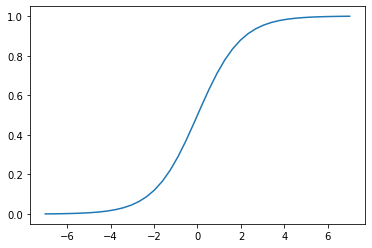

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# numpy np.linspace(start, stop, num),数据包含 stop 
x = np.linspace(start=-7, stop=7, num=40)

# 匿名函数 定义 sigmoid 函数
sigm = lambda x: 1/(1 + np.exp(-x))
y = sigm(x)

# 画图
plt.figure()
plt.plot(x, y)
plt.show()

### class_4
1. 第一节
    - 优化手写字体模型
        1. 使用 tf.AdamOptimizer 优化器，作为此模型的优化方法
        2. 随着迭代次数的增加，减小学习率的大小
        3. 模型为，输入、中间、输出
        4. 激活函数为 tanh (双曲正切)
        5. 损失函数为 __交叉熵__ 损失函数
    - 学习率衰减
        1. 待续......
    - 感悟
        1. Tensorflow __变量__ 很有趣

2. 第二节 [参考地址](https://zhuanlan.zhihu.com/p/36946874)
    - 理解；标量、向量、矩阵和张量的数学意义
        1. 标量（scalar） <br> 实际就是一个单独的数，又称纯数，只有大小、没有方向
        2. 向量（vector） <br> 实际就是一列数，指同时具有有大小、方向，且满足四边形法则的几何对象
        3. 矩阵（matrix） <br> 实际就是一个二位数组
        4. 张量（tensor） <br> 二位以上的数组，称之为张量
    - tensorboard 介绍
        1. 为解决对深度神经网络的理解和工程化带来的巨大挑战，Tensorboard 应运而生。Tensorboard 是 Tensorflow 的内置一个可视化工具，通过将 Tensorflow 程序输出的日志文件信息可视化，使得对 Tensorflow 的程序的理解、调试和优化更加简单高效。__Tensorboard 的可视化依赖 Tensorflow 程序运行输出的日志文件，因此 Tensorflow 和 Tensorboard 的程序运行在不同的进程中。__
        2. Tensorflow 程序分为两步：第一步，构图；第二部，计算图。Tensorboard在构图结束，开始执行，执行过程为：
            - 创建 writer，将默认图（默认图中的 OpNode）写入如日志文件 <br> `writer = tf.summary.FileWriter('logs', tf.get_default_graph())`
            - 保存日志文件 <br> `writer.close()`
            - 可视化命令：启动服务（在命令终端 cmd）<br> `tensorboard --logdir=logs`
            - 打开可视化界面，通过浏览器输入访问端口（最好使用 google 浏览器，毕竟东西是人家的嘛，给人家的面子！） <br> http:// xxxxx:6006
        3. Tensorboard 导航栏中只显示有数据的内容栏，如 GRAPH ，其它没有相关数据的子栏都隐藏在 INACTIVE 导航栏中。SCARLAR 栏中展示个标量训练过程的变化趋势，如 accuracy、cross entropy、learning_rate、网络各层的 baise 和 weight 等标量。
     - Tensorflow 的计算图结构，主要有以下几种元素
         1. Namescope：表示命名空间
         2. OpNode：操作节点
         3. Constant：常量
         4. Dataflow_edge：数据流向边
         5. Control_dependency_edge：控制依赖边
         6. reference_edge：参考边（初始化）

3. 第三节
    - 监视指标可视化（ __绘图遵循：时间步原理，最近的时间步在最前面__）
        1. SCALARS
            - Tensoboard 标量仪表盘，统计 tensroflow 中的标量（如：学习率、模型的总损失），随着迭代次数的变化情况
            - SCALARS 栏显示通过函数 `tf.summary.scalar()` 记录数据变化趋势
            - `tf.summary.scalar('learning_rate', learning_rate)`
        2. HISTOGRAMS
            - Tensorboard 张量仪表盘，统计 tensorflow 中的张量随迭代次数变化情况
            - `tf.summary.histogram('weight', weight)`
        3. DISTRIBUTIONS
            - Tensorboard 张量仪表盘，相对于 HISTOGRAMS ，用另一种直方图展示从 `tf.summary.histigram()` 函数记录的数据规律。它显示了一些分发高级统计信息（tensorboard 自动构成直方图）
        4. 汇总所有 tensorboard
            - `tf.summary.meger_all()` 
            - 将 megerd 当作一个 op ，在计算图中运行
            - 张量的直方图，函数如下：

In [2]:
# 定义绘张量图函数
def variable_scalars(var):
    with tf.name_scope('summaries'):
        with tf.name_scope('mean'):
            mean = tf.reduce_mean(var) # 平均值
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean))) # 均方差
            
        tf.summary.scalar('stddev', stddev) # 均方差
        tf.summary.scalar('max', tf.reduce_max(var)) # 最大值
        tf.summary.scalar('min', tf.reduce_min(var)) # 最小值
        tf.summary.histogram('histigram', var) # var 直方图

4. 第四节
    - Embedding Project
        1. Embedding Project 嵌入式仪表盘，是一个交互式的可视化工具，通过数据可视化来分析高维数据。
        2. 麻烦！！！待续...

### class_5
1. 第一节
    - 传统神经网络的问题
        1. 权值太多，计算量太大
        2. 权值太多，需要大量样本进行训练
    - 局部感受野
        1. 卷积核的大小（尺寸）
    - 卷积神经网络 CNN
        1. CNN __通过感受野__ 和 __权值共享__ 减少了神经网络需要训练的参数个数
    - 卷积核
        1. 可以称之为 __滤波器__
    - 卷积（采样）
        1. 输出采样 = （图像尺寸 - 卷积核大小 + 1）/ 步长 （适用于图像的长、宽）
    - 池化（降维，减少计算量）
        1. max-pooling，最大池化，在感受野中选取最大的
        2. mean-pooling，均值池化
        3. stochastic-pooling，随机池化
    - padding（填充）<font color=red>是先进行填充，在进行卷积、池化采样操作</font>
        1. same padding 作用：使用 0 进行填充，使得卷积窗口采样的到跟原来平面的小相同的平面
        2. vaild padding 作用：不会进行填充，卷积采样后得到一个不原来小的平面，就向下传递
    - 全连接层
        1. <br> <br>
    
    - 卷积神经网络实例j
        1. 将 MNIST 手写数字的图像 reshape 操作
        2. 输入 shape=(-1, 28, 28, 1)，-1 为一个批次图像数量；（28 * 28）为照片尺寸；1 为图像的通道数
        3. 卷积层一
            - 卷积层 <br> input ：为输入 <br> filter=(5, 5, 1, 32) ：(5, 5) 为卷积核大小，1 为上一层的图像的通道数，32 为该层卷积核数量 <br> strides=[1, 1, 1, 1] ：其中 strides[0]=strides[3]=1（规定为 1），strides[1] 为 x 方向的步长，strides[2] 为 y 方向的步长
            - 激活函数 <br> `tf.nnrelu(features)` 
            - 池化层 <br> value ：为输入值 <br> ksize=[1, 2, 2, 1]，其中 ksize[0]=ksize[3]=1（规定为 1），(2, 2) 为池化层大小 <br> strides 同上
        4. 卷积层二
            - 卷积层 <br> 卷积核尺寸大小 filter=(5, 5, 32, 64) ：这里只有通道数固定，因为通道数域上一层卷积核数相等
            - 激活函数
            - 池化
        5. 将卷积后的图像 shape=(-1, 7, 7, 64) 变成一维向量，因为要连接全连接层，`tf.reshape(-1, 7 * 7 * 64)`
        6. 全连接神经网络 <br> 大小 (7 * 7 * 64, 1024)，其中 7 * 7 * 64 为上一层输出的数据量（固定），可调节的时 1024（最好时 2 的平方，CPU、GPU好计算）
        7. 激活函数
        8. 全连接神经网络 <br> 大小 (1024, 10)， 1024 为上一层输出，10 为分类要求
        9. `tf.nn.softmax()`  激活函数
        10. 使用交叉熵损失函数
        11. 使用 `tf.train.AdamOptimizer()` 优化器
        12. 训练结果 <br> loss 几乎不变（2.），测试准确率特别低

### class_6
1. 第一节
    - 使用 Tensorboard 可视化卷积神经网络模型
        1. 训练的参数可视化
        2. 测试的参数可视化
2. 第二节
    - RNN（Recurrent Neural Network：循环神经网络） 介绍 [参考地址](https://zhuanlan.zhihu.com/p/32085405)
        1. 卷积神经网络-CNN 和普通的算法大部分是输入和输出的一一对应，也就是一个输入的到一个输出。不同的输入之间没有联系
        2. [序列数据-遗传相互依赖的数据流] 的场景就需要使用 RNN 来解决
            - 文章里的文字内容
            - 语音里的音频内容
            - 股票市场的价格走势
        3. RNN 存在的问题：<br> 短期记忆影响较大，长期记忆影响较小，这就是 RNN 存在短期记忆问题 <br> RNN 有短期记忆问题，无法处理很长的输入序列 <br> 训练 RNN 需要极大的成本
    - LSTM 实现
        1. 有时间看一下源码（tensorflow）

### class_7
1. 第一节
    - 回顾 LSTM 网络
2. 第二节 [保存模型参考地址](https://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/)
    - 保存训练模型参数 <br> `saver = tf.train.Saver()`
        1. 使用手写数字识别（人工神经网络模型）
    - Tensorflow 模型文件
        1. 文件结构 <br>
            |--net <br>
            |&nbsp; &nbsp; &nbsp; &nbsp; |--checkpoint <br>
            |&nbsp; &nbsp; &nbsp; &nbsp; |--my_model.data-00000-of-000001 <br>
            |&nbsp; &nbsp; &nbsp; &nbsp; |--my_model.index <br>
            |&nbsp; &nbsp; &nbsp; &nbsp; |--my_model.meta <br>
        2. meta 文件 <br> my_model.meta 文件保存的是图结构，meta 文件是 pb（protocal buffer）格式文件，包含变量、op、集合等
        3. ckpt 文件 <br> ckpt 文件是二进制文件，保存了所有的 weights、biases、gradients等变量，现在通过两个文件保存：[my_model.data-00000-of-00001, my_model.index]
        4. checkpoint 文件 <br> 记录目录下所有模型文件列表
    - 载入数据（1） <br> `saver.restore()`
        1. 这里有两种载入模型方法，这里只说明麻烦的
    - 载入模型（2)
        1. 构造计算图 <br> `saver = tf.train.import_meta_graph('./net/my_model.meta')`
        2. 加载参数 <br> `saver.restore(sess, tf.train.latest_checkpoint('./net'))`
3. 第三节
    - 下载 Goolge 图像识别网络 Inception-v3 并查看结构
4. 第四节
    - 使用 Inception-v3 识别图片（1000 分类）
        1. 感觉效果可以勉强接受
        2. 查看 GoogleNet 的知识 [网址](https://blog.csdn.net/u010402786/article/details/52433324)

### class_8
1. 第一节
    - CUDA 的使用介绍
        1. 使用 GPU 计算，加速计算速度
        2. CUDA（Compute Unified Device Architecture），是显卡厂商 NVIDIA 推出的运算平台。 CUDA™ 是一种由 NVIDIA 推出的通用并行计算架构，该架构使 GPU  能够解决复杂的计算问题。
    - cuDNN 的介绍
        1. 利用 GPU 加速神经网络计算
    - 下载 CUDA 
        1. [网址](https://developer.nvidia.com/cuda-downloads)
        2. 最好下载本地安装 [local]
    - 安装 CUDA（window10），Linux 的不好装
        1. 准备 NVIDIA 的显卡（查看显卡的版本型号是否支持，支持 CUDA 的哪个版本）
        2. 第一个选择路径文临时的，安装完成会自动删除
        3. 第二个选择的有三个路径，自定义（不管怎么定义都会有文件在 c 盘安装）
        4. 不用添加环境变量（会自动添加）
        5. 查看 CUDA `nvcc --version`
    - 安装 cuDNN
        1. [网址](https://developer.nvidia.com) ，需要注册
        2. 下载与 CUDA 对应的 cuDNN 版本号
        3. 解压 cuDNN 得到三个文件
        4. 将其分别拷贝到 CUDA 对应对文件中 [bin, inculde,lib]
        5. cuDNN 安装完成  
2. 第二节
    - 训练自己的神经网络图片分类模型的 3 方法
        1. 从无到有
            - 参数初始化（随机）
            - 需要大量样本做支撑
            - 训练时间周期长
        2. 迁移学习 <br> 固定除最后一层（也就是 softmax 层），其余层的所有参数，不参与训练，根据自己的需要更改最后一层定义自己的分类模型，把固定第的模型当 input 传入自定义模型
            - 参数初始化（别人训练好的参数）
            - 制作相对较少的样本
            - 训练时间周期断
        3. 迁移学习 <br> 和 2 相同，只是整个模型参数全部参与训练
            - 训练时，学习率调低（网络进行微调）
            - 自定义模型，进行全部训练
    - 第二种方法讲解
        1. 在 github 上，下载 [retrain.py 文件](https://github.com/tensorflow/hub)，这个下载会用会报错（本人无法接解决） <br> 错误文件 error.txt <br> 访问此[retrain.py 文件](https://github.com/googlecodelabs/tensorflow-for-poets-2/blob/master/scripts/retrain.py)
        2. 安装 tensorflow-hub 模块 <br> `pip install tensorflow-hub`
        3. 安装 bottleneck 模块 <br> `pip install bottleneck` <br> 如果报错，缺少 `Microsotf c++ 14.0 is required` 什么的问题，只能安装 Visual studio 了，在安装 c++ 桌面。[参考地址](https://blog.csdn.net/HeyShHeyou/article/details/82022948)
        4. 下载数据集 [数据集](http://www.robots.ox.ac.uk/~vgg/data/)
        5. 执行 retrain.bat 文件
            - 之前下载的 retrain.py 文件，是 tensorflow 官方写好的一个脚本，为了方便复用 inception-v3 ，所以只要执行 retrain.py 传入必要的参数，就可以自定义（训练 sofamax 层参数）复用 inception-v3 模型
            - 参数 bottleneck：bottleneck 文件夹，存放 inception-v3 模型 sotfmax 层之前的层处理图片之后的数据 <br> 在解释以下：就是第二种复用 inception-v3 的方式，是把 inception-v3 当作一个提取图片特征的一个模型（去掉后面的 softmax 分类层），所以 inception-v3 提取完的图片特征是一些数值类型数据，而非图片，所以 bottleneck 文件夹是为了存储 inception-v3 提取的图片特征数据的ho
            - 参数 how_many_steps：200 迭代 200 次
            - 参数 model_dir：存放 inception-v3 模型的压缩包（不是解压的文件）
            - 参数 output_graph：输出自定义模型训练图
            - 参数 output_labels：输出样本标签
            - 参数 image_dir：训练图片存放地址 <br> 存放格式 train |-<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | airplane <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | face <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | flower
            - 参数 summaries_dir：保存模型文件（tensorboard），两个文件，不知道具体代表什么
    - 使用第二种复用 inception-v3 预测图片
        1. 文件 prediction.ipynb 
        2. 没有什么特别注意的

3. 第三节
    - slim 的使用，不会，不准备学习
    - 学习 keras

### class_9
1. 第一节
    - 验证码生成
        1. 使用 captcha 模块 <br> `pip install captcha`
    - 将图片（验证码）转换为 TFrecord 格式文件（.tfrecords）
        1. tfrecord 是 Google 推出的一种二进制文件，理论上可以保存任何格式
        2. [tfrecord 文档](https://www.tensorflow.org/tutorials/load_data/tfrecord)    [学习文档](https://juejin.im/entry/5b30af58518825749630f045) 两个结合着看
        3. tfrecord 格式文件想要写入信息，首先先建立 Example 消息体（就是数据存放格式）
        4. Example 格数

In [3]:
#         features {
#           feature {
#             key: "data"
#             value {
#               bytes_list {
#                 value: "\000\000\000\000\001\00"
#               }
#             }
#           }
#           feature {
#             key: "name"
#             value {
#               bytes_list {
#                 value: "cat"
#               }
#             }
#           }
#           feature {
#             key: "shape"
#             value {
#               int64_list {
#                 value: 4
#                 value: 4
#                 value: 1
#               }
#             }
#           }
#         }

5. tensorflow 官网，写好了一些函数可以复制使用

In [6]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

6. 构造 Example 消息体代码 <br> name 关键字 _bytes_feature() 为谷歌官方给出的函数（可以自定义） <br> shape 关键字 tf.train.Feature(int64_list=xxx),仔细可以看出官方给出的函数，也就是返回该 tensorflow 函数 
7. 注意点：<br> tfrecord 格式文件，有三种数据类型 [Int64List, BytesList, FloatList] ，其中三种中每一种又包含了几种数据类型（既可以发生强转，如：布尔类型 True，就可强转为 Int64List 中的 1） <br> tf.train.Feature(float_list=tf.train.FloatList(value=[value])) 参数 value 必须是可迭代对象 <br> example = tf.train.Example(features=tf.train.Features(feature=feature)) features 有 s
8. 使用习惯：<br> 字符串：转换为 字节，使用 BytesList <br> 矩阵（图像数据）：转换为 字节（image.tobytes()）value=[image.tobytes()]，使用 BytesList
9. 有些数据看个人习惯：<br> 像图片的 shape，本身是 tuple 元组，可以使用 Int64List，像下面代码一样 <br> 也可以将其转换为矩阵，再转为 BytesList（毕竟我们需要的数据）

In [8]:
# feature = {
#    'name': _bytes_feature(b'cat'),
#    'shape': tf.train.Feature(int64_list=tf.train.Int64List(value=[shape[0], shape[1], shape[2]])),
#    'data':tf.train.Feature(bytes_list=tf.train.BytesList(value=[data.tobytes()]))
# }
# example = tf.train.Example(features=tf.train.Features(feature=feature))

10. 使用 tf.python_io.TFRecordWriter(file_path) 打开 tfrecord 格式文件
11. 使用 write(example.SerializeToString()) 将其 example 转换为 string 类型 写入文件中（二进制字符串）

2. 第二节
    - 第一种 验证码识别方法
        1. 把标签转换为向量，向量长度为 40 （one-hot） <br> 数字 1 ：[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        2. 训练方法和 0-9 手写数字识别类似
    - 第二种验证码识别方法
        1. 拆分为 4 个标签 <br> 比如 验证码为 0782 <br> lanbel0:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0] <br> lanbel1:[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] <br> lanbel2:[0, 0, 2, 0, 0, 0, 0, 0, 0, 0] <br> lanbel3:[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
        2. 可使用多任务学习方式
    - 多任务学习方式
        1. 交替训练 <br> 两个数据集，两个损失函数，两个优化器，只是用相同的特征提取层，交替训练共享层（特征提取层）
        2. 交替训练例子：训练讲英语翻译成中文、日文，两个数据集，两个损失函数，只是使用相同的特征提取层，先训练中文翻译，训练完成，共享层后面的参数固定，在训练日文翻译，共享层参与训练，非共享层参数固定，再训练中文翻译...，反复训练
        3. 联合训练 <br> 数据集相同，但任务有多个（加入有 4 个任务），定义多个损失函数（4 个损失函数），将多个损失相加，共同优化（优化器是一个），同时训练
        4. 联合训练例子：训练验证码识别，数据集一个，但标签有 4 个，所以有四个任务，定义 4 个损失函数，共同优化，同时训练
3. 第三节
    - 使用联合训练
    - 自定义卷积神经网络模型
    - 多任务（多 loss）
    - TFrecord 文件格式的读写
    - 构造 卷积神经网络，两层全连接神经网络
        1. 得使用 tensorflow 2.0 版本读写 TFRecord 文件（以后再看）
        2. 不使用 TFRecord 格式文件
        3. 使用变化 __学习率__
        4. 迭代 500 次
    - 使用 .py 文件
        1. 方便调试（因为需要拿到服务器上训练）
4. 第四节
    - 测试识别验证码（多任务模型）
    - 这块不想写了，就是一个模型复用
        1. 读出图片，预处理，获取图片预处理完得数据，及标签
        2. 导入 图、参数
        3. 就是将训练得 batch_size 变为 1

### class_10
1. 第一节
    - word2vec（词转成向量）
        1. 当我们分析图片或者是语音的时候，我们通常都是在分析密集的、高纬度的数据集。我们所需要的全部信息都存储再原始数据中
        2. 当我们处理自然语言问题的时候，我们通常会做分词，然后给每一个词一个编号。比如，猫的编号是 120，狗的编号是 343，女生的编号是 1232，女王的编号是 2329。这些编号没有规律，没有联系，我们从编号中不能得到词与词之间的相关性 <br> 例如：how are you ? <br> how：234 <br> are：7 <br> you：987 <br> 再转换为 one-hot 编码，数据特别稀疏，从编号中很难看到之间的相关性。
    - Google 提出了 world2vec
        1. CBOW
        2. Skip-Gram
    - CBOW（连续词袋模型）
        1. 根据词的上下文词汇来预测目标词汇。
        2. 例如，上下文词汇是 "今天早饭吃__"，要预测的目标词汇可能是 "面包"
    - Skip-Gram 模型
        1. Skip-Gram 模型刚好和 CBOW 相反，它通过目标词汇来预测上下文词汇。
        2. 例如，目标词汇是 "早餐"，上下文词汇可能是 "今天" \ "吃面包"
    - CBOW 和 Skip-Gram
        1. 对于这两种模型的训练，我们可能很容易想到，使用 softmax 作为输出层来训练模型。这个方法是可行的，只不过使用 softmax 作为输出层计算量将会是巨大的。加入我们已知上下文，寻妖训练模型预测目标词汇，总共有 50000 个词汇，那么每一次训练都需要计算输出层 50000 个概率值。
        2. 所以训练 word2vec 模型我们通常可以选择使用 __噪声对比估计（Noise Contrastive Estimation）__ 。NCE 使用方法是把上下文 h 对应地正确的目标词汇记为正样本（D=1），然后抽取一些错误词汇作为负样本（D=0）。然后最大化目标函数 <br> $J_{NEG}=\log(Q_{\theta}(D=1|w_t,h)) + kE_{\hat{w}-P_noise}[\log(Q_{theta}(D=0|\hat{w},h))]$
        3. 当真实的目标单词被分配到较高的概率，同时噪声单词的概率很低时，目标函数也达到最大值了。计算这个函数时，只需要挑选出来的 k 个噪声单词，而不是整个语料库。所以训练速度会很快

2. 第二节
    - CNN 在自然语言处理的应用
        1. 说到 CNN 我们首先可能会想到 CNN 在季孙继视觉的应用。最近几年 CNN 也开始应用于自然语言处理。并取得了一些引人注目的成绩
        2. CNN 应用于 NLP 的任务，处理的往往是以矩阵形式表达句子或文本。矩阵的每一行对应于一个分词元素，一般是一个单词，也可以是一个字符。也就是说每一行都是一个词或者字符的向量（比如，前面说到的 word2vec）。假如我们一共有 10 个分词，每一个词都是用 128 维向量来表示，那么我们就可以得到一个 10 * 128 维的矩阵。这个矩阵就是相当于一副"图像"。

### class_11
1. 第一节
    - CNN 语音处理
        1. 将 N 个采样点集合成一个观测单位，成为帧。通常 N 的值为 256 或者 512，覆盖的时间约为 20-30 ms左右。为了比卖你两帧之间的变化过大，因此会让两相邻帧之间有一段重叠区域。通常语音识别所采用的语音信号的采样频率为 8 KHz 或 16 KHz。
    - 梅尔频率倒谱系数（MFCC）
        1. MFCC 是一种广泛使用的语音特征。
        2. 语音被分为很多帧，每帧语音对应于一个频谱（通过 FFT 计算得到），频谱表示频率与能量的关系
    - 共振峰
        1. 峰值就表示语音的主要频率成分，这些峰值成为共振峰，共振峰携带了声音的辨识属性。用它就可以识别不同的声音
    - 包络
        1. 我们需要把共振峰提取出来，不仅要提取共振分的位置，还要提取他们转变的过程，也就是频谱的包络。包络就是一条连接这些共振峰点的平滑曲线
    - Mel 频率分析
        1. 人类听觉特征对低频敏感，对高频一般（对低频提取较多的特征，对高频提取较少的特征）
2. 第二节
    - python处理语音包
        1. librosa
    - 显示进度条 python 包
        1. tqdm